# Module 1 Final Project

For: Langleer Real Estate Associates

By: Jonathan E Ericksen, JE Consulting

## Background:

Langleer Real Estate Associates (LREA) has contracted with JE Consulting to develop a statistical model to predict housing prices within the greater King County, WA territory. The intent is to provide a tool by which LREA agents can leverage when consulting with clients who are looking to sell their real estate holdings. 

The content herin describes the methodology and technical steps used by JE Consulting to develop and improve the predictive regression model for use by the client. 

## Objective:

LREA has contracted with JE Consulting with the objective to build a multi-variate regression model that accuratley predicts housing prices throughout the King County territory. The resulting model will be used by LEAR associates as a tool to  engage when consulting with prospective sellers on a price to list their property. Further, this model will be used in consultation with future prospective sellers as to meaningful impovements that can be made to existing property, i.e., adding an extra bathroom, that will quantify the increase in home's value.

Upon completion, the model will exist within the confines of LEAR's current technology stack, and later used as an engine driving a mobile application for use by agents in the field. The mobile application will take in existing parameters on a given property, provide an estimated sale price, followed by an explatory workflow whereby agents can run hypothetical scenarios on potential property improvements and the resulting affects on the future sale price.

In addition to developing a predictive model, LREA would like these key questions answered through detailed visualizations from the existing data: 

- How are housing prices (home values) distributed throughout King County? And what factors might explains the concentration of expensive housing towards the northeast corner of the county?
- Does the age of the house have a noticeable impact on value?
- Does King County exhibit any seasonality in terms of housing inventory turnover?


## Methodology:

This project was approached using the industry standard OSEMiN process. The 5 stages in OSEMiN are outlined in the table of contents below with each stage highlighted within the ensuing notebook:

**Table of Contents:**

- **Obtain**: 
    - Sourcing the data

- **Scrub**: 
    - Data processing, cleaning & wrangling

- **Explore**: 
    - Question One, Visual One, Answer One
    - Question Two, Visual Two, Answer Two
    - Question Three, Visual Three, Answer Three
    - EDA Summary
    
- **Model**: 
    - Condition the data by identifying correlations and solving for coliniearity
    - Model the Data
    - Final Model
    - Model Summary
    - Cross Validation

- **Interpret**: 
    - Interpret the final results explaining the implications of the resulting coefficents & predictions


*(non- OSEMiN additions)*
- **Recommendations**
- **Conclusions**
- **Future Work**
------------------------------------------------------------------------------------------------------------------

### Obtaining The Data

Section Highlights:
- Import applicable libraries/packages
- Import data file as a pandas dataframe assigning it to the variable 'df'

------------------------------------------------------------------------------------------------------------------

*Import applicable libraries/packages*

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np

import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

*Importing the data file using pandas and storing it as a datafram assigned to the variable 'df'*

In [3]:
df = pd.read_csv('kc_house_data.csv')

### Scrubbing The Data

Section Highlights:
- Data familiarization (five point statistics)
- Removed ambiguous columns (yr_renovated, id)
- Removed rows with null values in the 'view' column 
- Replaced null values in the 'waterfront' column with the column median value
- Replaced the placeholder data ('?') in the 'sqft_basement' feature with the median column value

------------------------------------------------------------------------------------------------------------------

*Inspecting the columns from the dataset*

In [67]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

*Inspecting the dataframe shape*

In [68]:
df.shape

(21597, 21)

*Inspecting the dataframe head*

In [69]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


*Inspect the data types as well as data volumes. Looking for missing values within the given features*

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


*Analyzing the five point statistics while rounding resulting output to 2 decimal points*

In [71]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


*Beyond using the standard methods for familiarizing myself with the data, I ran a pandas profiling feature that provides an organized report on the dataset*

In [72]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,21597
Total Missing (%),1.4%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


*After familiarizing myself with the data through initial observations, I've decided to remove the 'id' and 'yr_renovated' columns due to the ambiguos nature of these data, i.e., 'renovations' is a subjective term and 'id' is not needed for any statistical analysis using only one datasource - no joining of data necessary during this project.*

In [73]:
df.drop(columns = ['id', 'yr_renovated'], inplace = True, axis = 1)

*Sought the variables with missing values while calculating the percentage of null values against the 
total dataset count*

In [74]:
(df.isna().sum() / len(df))*100

date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

*Decided to remove rows with null values in the 'view' column after determining there would be only .3% amount of data loss*

In [75]:
df.dropna(how = 'any', axis = 0, subset = ['view'], inplace=True)

*Viewing the 'waterfront' histogram to better understand the distribution of values for future data filling*

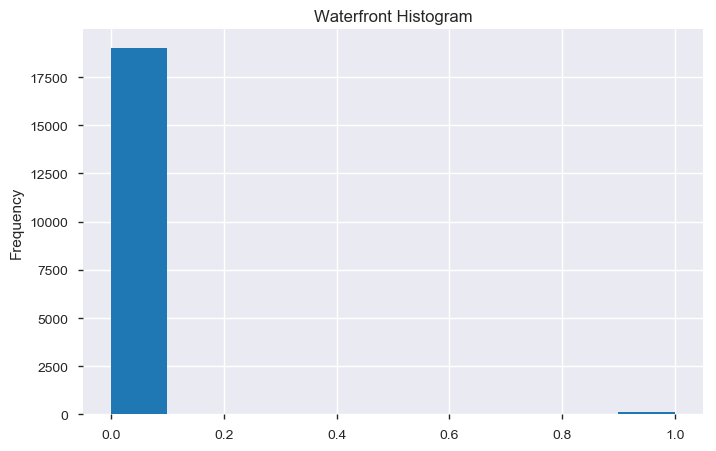

In [76]:
df['waterfront'].plot(kind='hist', figsize = (8,5), title = 'Waterfront Histogram')
plt.show()

*Calculating the median 'waterfront' value to ensure it matches what the histogram above indicates*

In [77]:
df.waterfront.median()

0.0

*Replaced the 'waterfront' null values with the median value for the feature, which is 0*


In [78]:
df.waterfront = df.waterfront.fillna(value = df.waterfront.median())

*Confirming all null values have been removed from the dataset*

In [79]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

*Identifying data in the 'sqft_basement' feature that are not integers as the datatype for the column is currently recognized as a string. Based on the profiling report above, the '?' needs to be addressed as it's likely a placeholder input.*

*Below, I'm summing the count of string characters in the 'sqft_basement' variable*

In [80]:
print(df['sqft_basement'].head())

print((df['sqft_basement'] == '?').sum())

print(df['sqft_basement'].describe())

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object
452
count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object


*Developed a for loop to cycle through the 'sqft_basement' and for each float value, appended to the 'basement_vals'
list. From there, we calculated the mean value for all the values extracted from the 'sqft_basement' feature that now exists in the newly created 'basement_vals' list*

In [81]:
basement_vals = []

for footage in df.sqft_basement:
    try:
        basement_vals.append(float(footage))
    except:
        continue

sqft_mean = np.mean(basement_vals).round(2)
sqft_mean

291.36

*With the mean calculated above, I'm replacing all of the '?' placeholder values with the mean value for 'sqft_basement'*

*Following that, I confirm all '?' characters were removed usint the print sum statement*

In [82]:
df.sqft_basement.replace(to_replace = '?', value = sqft_mean, inplace = True)

print((df['sqft_basement'] == '?').sum())

0


*Casting the 'sqft_basement' variable to a float from string*

In [83]:
df.sqft_basement.dtype

dtype('O')

In [84]:
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

df.sqft_basement.dtype

dtype('int64')

*Once more, I'm confirming all feature variables have been assigned to the appropriate datatype*

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.3+ MB


### Exploring The Data

I attempt to answer the following questions through visualizations from the dataset per LREA's request:
- How are housing prices (home values) distributed throughout King County? And what explains the concentration of expensive housing in the northeast corner of the county?
- Does the age of the house have a noticeable impact on value?
- Does King County exhibit any seasonality in terms of housing inventory turnover?

--------------------------------------------------------------------------------------------------------------

##### Question One: 

How are housing prices (home values) distributed throughout King County? And what explains the concentration of expensive housing in the northeast corner of the county?

*The graphic below functions as a heatmap using the positional data, 'long' and 'lat', to create a layout depicting the price of house with a color scale throughout King County*

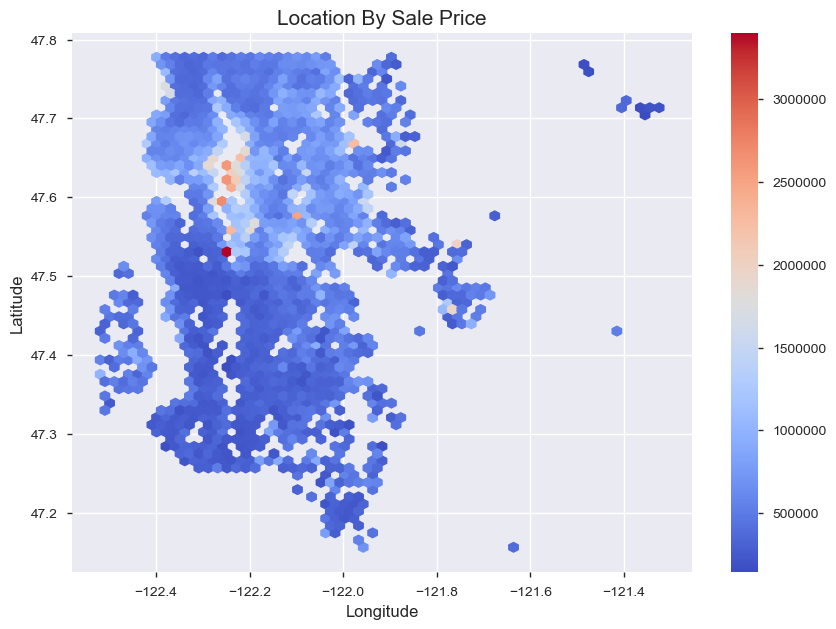

In [86]:
df.plot.hexbin(x = 'long', y = 'lat', C = 'price', gridsize = 60, cmap = 'coolwarm', figsize = (10, 7))

plt.title('Location By Sale Price', fontsize = 15)
plt.ylabel('Latitude', fontsize = 12)
plt.xlabel('Longitude', fontsize = 12)
plt.show()

*Below is an import of a map image of King County to reference against home values distributed throughout King County from the graphic above*

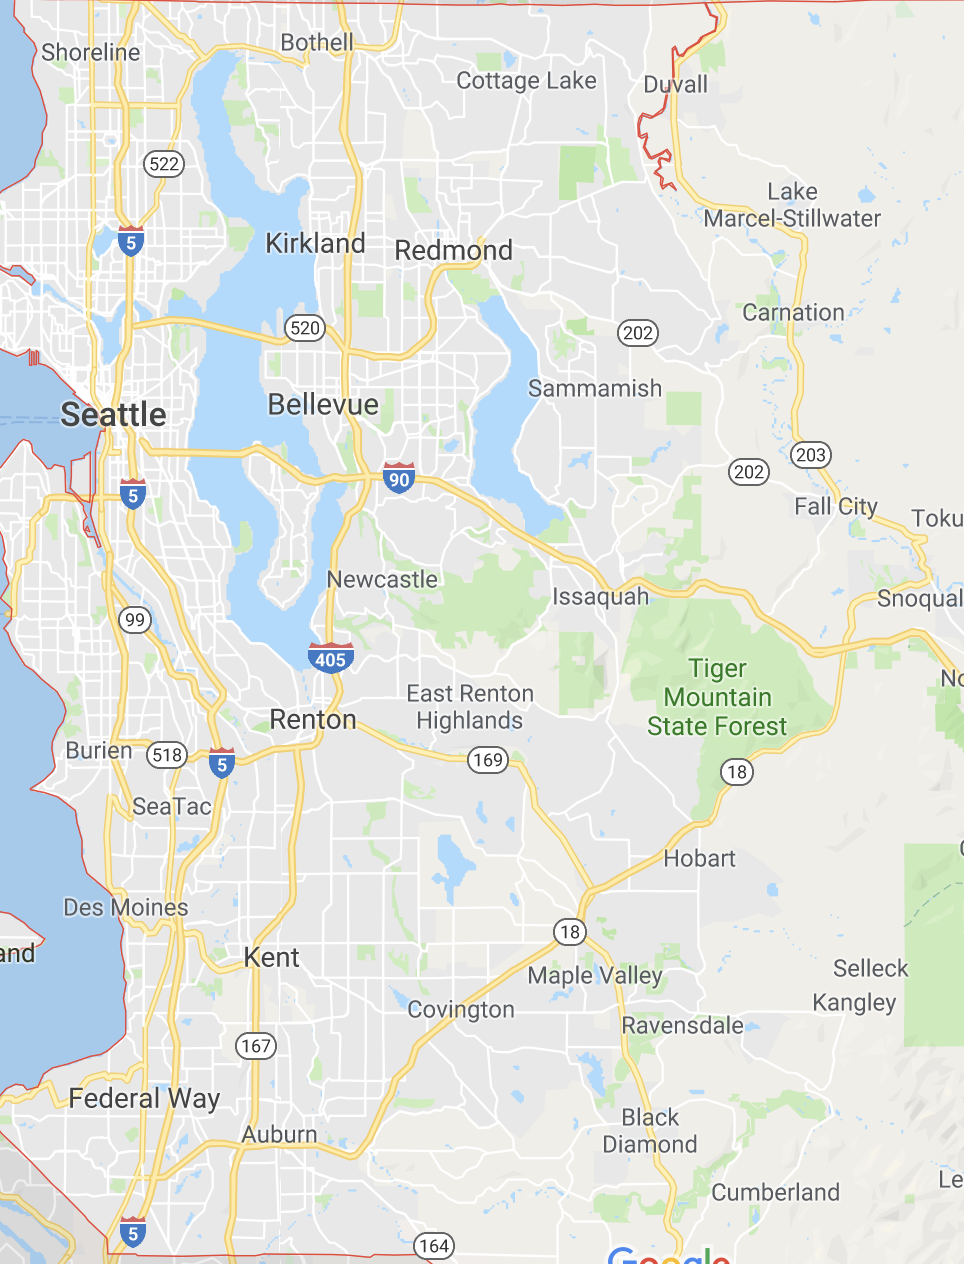

In [87]:
from IPython.display import Image
Image(filename = 'King County Metro Area.png', width=400, height=400)

##### Question One - Answer:

The distribution of home values throughout King County highlight a stark concentration of higher valued homes in and around the Kirkland area. This is likely explained due to it's proximity to highly concentrated white collar work environments, close proximity to shopping, upscale eateries, et cetera. 

Further, housing prices are likely exacerbated by proximity to the popular Lake Washington. As per convention, lakeside housing prices are often correlated with higher prices based on quality water views, access to beaches, and recreation.

It's likely these are the two largest contributing factors to the concentration of higher home values. 

--------------------------------------------------------------------------------------------------------------

##### Question Two: 

Does the age of the house have a noticeable impact on value?

*Using the seaborn jointplot method to plot house age against price during the time period for which sales data was 
captured*

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


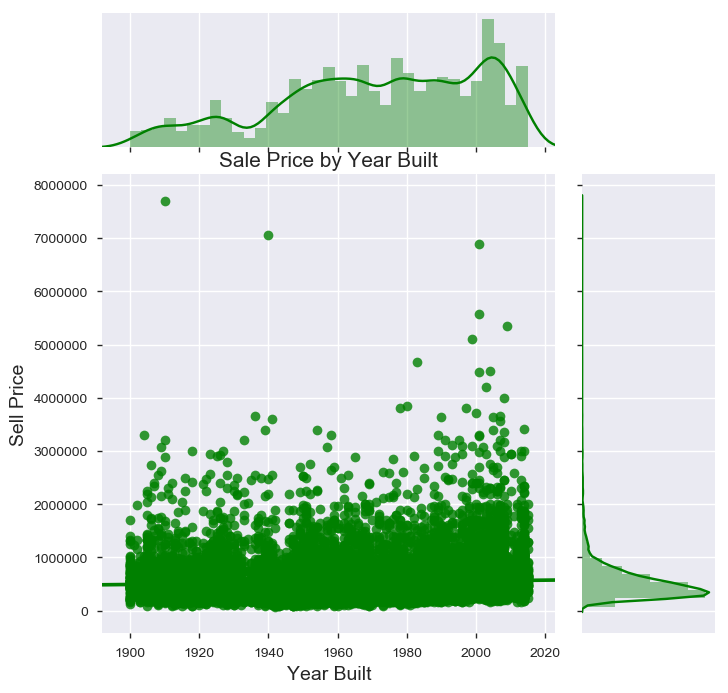

In [88]:
sns.jointplot(x = 'yr_built', y = 'price' , data = df, kind = 'reg', height = 7, xlim = (1892, 2023), 
              color = 'g', ratio = 3)

plt.title('Sale Price by Year Built', fontsize = 15)
plt.ylabel('Sell Price', fontsize = 14)
plt.xlabel('Year Built', fontsize = 14)
plt.show()

##### Question Two - Answer:

Based on the scatter plot above, which plots the age of the house against the price, it seems there is no clear impact from age on sale price. The jointplot includes a regression line as seen on either side of the plotted points. This regression line indicates little to no correlation between sale price and the age of the house.

Further, histogram plots are included opposite to the variable axis to visualize the distribtion of housing age and price. Of note, there was a greater number of sales for newer properties while the sale price is normally distributed around the $500,000 price point with multiple higher valued properties serving as outliers.  

--------------------------------------------------------------------------------------------------------------

#### *Question Three:* 

Does King County exhibit any seasonality in terms of housing inventory turnover?

*To answer this question, I began by casting the 'date' variable to a datetime series from an object data type for graphing a distribution plot of total housing sales by month*

In [89]:
df.date.dtype

dtype('O')

In [90]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df.date.dtype

dtype('<M8[ns]')

*Below I'm adding a new column to the dateframe that captures the numeric number of the month as an 'int' datatype*

In [91]:
df["month"] = df.date.dt.month
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,291.352419,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,6.575555
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,437.344155,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308,3.113740
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


*In order to properly label the months with string values graphing, I created a list of the months in a year to later combine with the 'month' column*

In [92]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

*Here I'm creating a 'month_map' dictionary with the kays as a range 1-12 and the values as the 'months' list above.*

In [93]:
month_map = dict(zip(range(1, 13), months))

*Finally, I'm creating a new column, 'month_name', by mapping the 'month' column in the dataframe using the 'month_map' dictionary*

In [94]:
df["month_name"] = df["month"].map(month_map)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,month_name
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,Oct
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,Dec
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,98028,47.7379,-122.233,2720,8062,2,Feb
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,Dec
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,Feb


*Plotting the visualization which aggregates home sales by month*

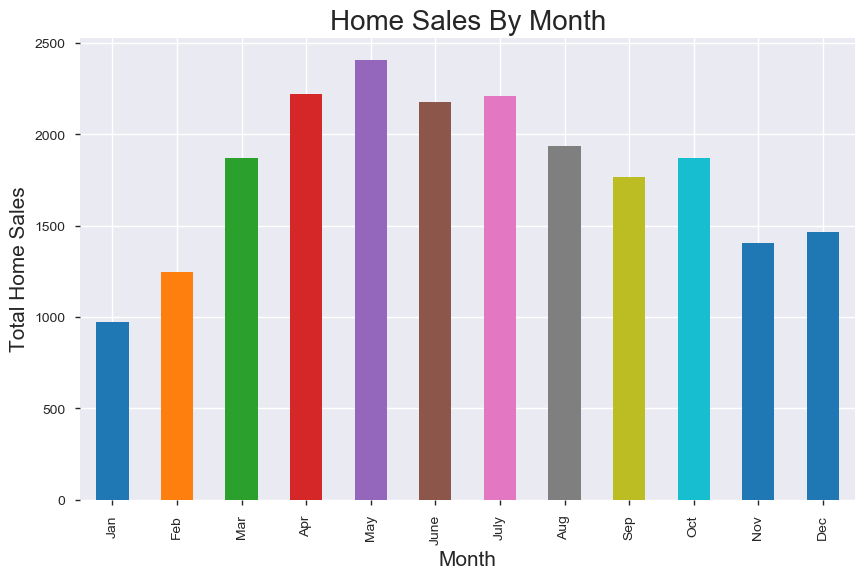

In [95]:
plt.figure(figsize = (10,6))
ax = df["month"].value_counts().sort_index().plot(kind='bar')

plt.title("Home Sales By Month", fontsize = 20)
plt.ylabel('Total Home Sales', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks(ticks=range(12), labels=months)

plt.show()

#### *Question Three - Answer:*

From the histogram above, it's clear inventory turnover is lowest during the winter months with January having less than 1,000 closings throughout King County. The month of May had the highest turnover with roughly 2,400 closings. That's more than double housing sales from January. More broadly, the spring and summer (March - August) months saw much higher turnover than the fall and winter months (September - February). 

The obvious implaction for LREA is to adjust the necessary resources to account for lower sales volumes during the winter months, i.e., prepare for cashflow variations throughout the fiscal year, increase marketing spend during the winter months to boost sales (commisions), and offer incentives for sellers during December and January. 

Conversly, adjusting the commision rates higher during the summer months to further increase cashflow would be an astute strategy. This would increase resources on hand prior to the fall and winter months.  


### Exploring The Data - Summary

In summary, seasonality affects sales volumes which should be accounted for during LREA's resource planning process. Age of a property has no affect on the price. And generally speaking, the further north and west a property is within the county, the more expensive the house will be. Particularly along the Lake Washington lakeshore near Kirkland. 

--------------------------------------------------------------------------------------------------------------

### Modeling the Data

- Conditioning the data
- Running the OLS models
- Final model
- Model summary
- Recommendations
- Conclusion
- Areas for future work

------------------------------------------------------------------------------------------------------------------

#### *Conditioning the Data - Correlation, Collinearity*

*In preparation for modeling the data, I began by running a few correlation matrices using a seaborn heatmap. This step is necessary for identifying features that correlate with each other (colinearity) in addition to correlation with the target variable.*

*I begin by running a correlation matrix using all remaining features from the dataframe.* 

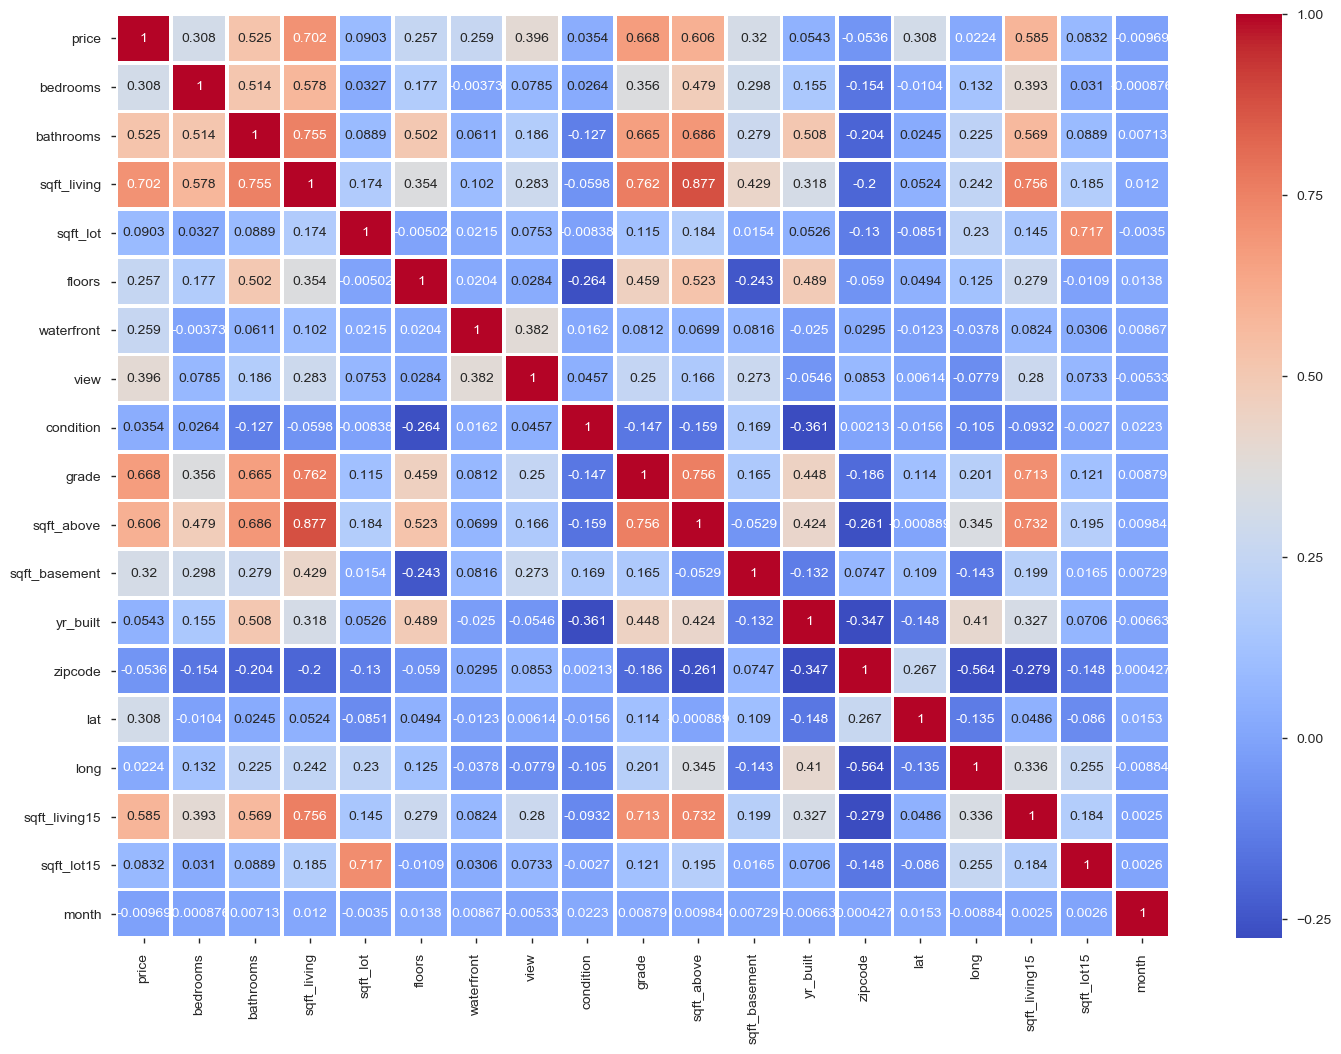

In [96]:
corr = df.corr()
plt.figure(figsize=(17, 12))
sns.heatmap(corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 2, robust = True, )
plt.show()

*After reviewing the correlation matrix, I've decided to initally remove the 'date', 'month', 'sqft_lot15', 'zipcode', 'yr_built', 'condition', 'waterfront','sqft_lot', 'month_name' features based on their poor corelation with the predicted variable, 'price'.*

In [97]:
df.drop(columns = ['date', 'month', 'sqft_lot15', 'zipcode', 'yr_built', 
                   'condition', 'waterfront','sqft_lot', 'month_name'], axis=1, inplace=True)

*Confirming the desired remaining features were not removed by calling the columns by calling the df.head() method*

In [98]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0.0,7,1180,0,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0.0,7,2170,400,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0.0,6,770,0,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0.0,7,1050,910,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0.0,8,1680,0,47.6168,-122.045,1800


*Once more, I'm checking for correlation and multicolinearity among the remaining variables.*

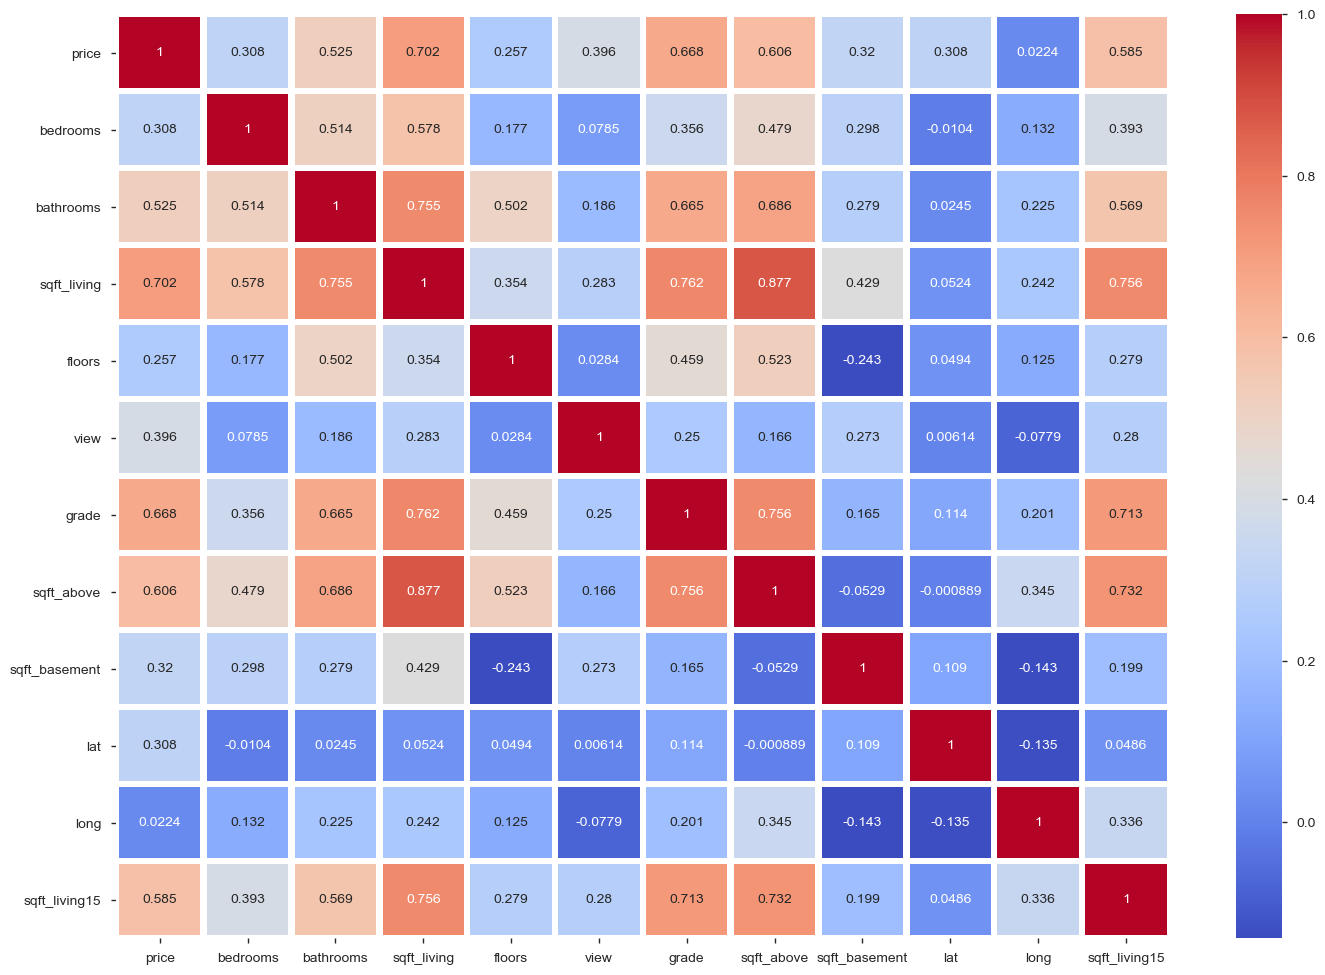

In [99]:
corr = df.corr()
plt.figure(figsize=(17, 12))
sns.heatmap(corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 4, robust = True, )
plt.show()

*Due to extreme collinearity between 'sqft_living' and 'sqft_above' + 'sqft_basement', I further dropped the 'sqft_living' column along with the 'grade' feature due to collinearity with other features*

In [100]:
df.drop(columns = ['sqft_living', 'grade'], axis = 1, inplace = True)

*To address correlation between 'bathrooms' and 'bedrooms', I'm creating a new column, 'bathrooms_plus_bedrooms', by summing the 'bathrooms' and 'bedrooms' columns.*

In [101]:
df['bathrooms_plus_bedrooms'] = df['bathrooms'] + df['bedrooms']

*Here, I'm setting a new features datafram by setting it equal to the orignal dataframe while dropping the target variable as well as the now unneeded 'bathrooms' and 'bedrooms' features.*

In [102]:
df_features = df.drop(columns = ['bathrooms', 'bedrooms', 'price'])

*Inspecting the newly created features dataframe to confirm the desired features remain.*

In [103]:
df_features.head()

,floors,view,sqft_above,sqft_basement,lat,long,sqft_living15,bathrooms_plus_bedrooms
0,1.0,0.0,1180,0,47.5112,-122.257,1340,4.00
1,2.0,0.0,2170,400,47.7210,-122.319,1690,5.25
2,1.0,0.0,770,0,47.7379,-122.233,2720,3.00
3,1.0,0.0,1050,910,47.5208,-122.393,1360,7.00
4,1.0,0.0,1680,0,47.6168,-122.045,1800,5.00


*I then build a correlation matrix using the features from the 'df_features' datafram to eyeball any collinearity.*

In [104]:
df_features_corr = df_features.corr()
df_features_corr

,floors,view,sqft_above,sqft_basement,lat,long,sqft_living15,bathrooms_plus_bedrooms
floors,1.000000,0.028436,0.523367,-0.242841,0.049419,0.125329,0.279176,0.372647
view,0.028436,1.000000,0.166299,0.273381,0.006141,-0.077894,0.279561,0.146279
sqft_above,0.523367,0.166299,1.000000,-0.052879,-0.000889,0.345051,0.731543,0.657611
sqft_basement,-0.242841,0.273381,-0.052879,1.000000,0.109392,-0.143052,0.198715,0.332148
lat,0.049419,0.006141,-0.000889,0.109392,1.000000,-0.135439,0.048569,0.006210
long,0.125329,-0.077894,0.345051,-0.143052,-0.135439,1.000000,0.336019,0.200094
sqft_living15,0.279176,0.279561,0.731543,0.198715,0.048569,0.336019,1.000000,0.542594
bathrooms_plus_bedrooms,0.372647,0.146279,0.657611,0.332148,0.006210,0.200094,0.542594,1.000000


*Below I re-plot the correlation matrix using the seaborn heatmap.*

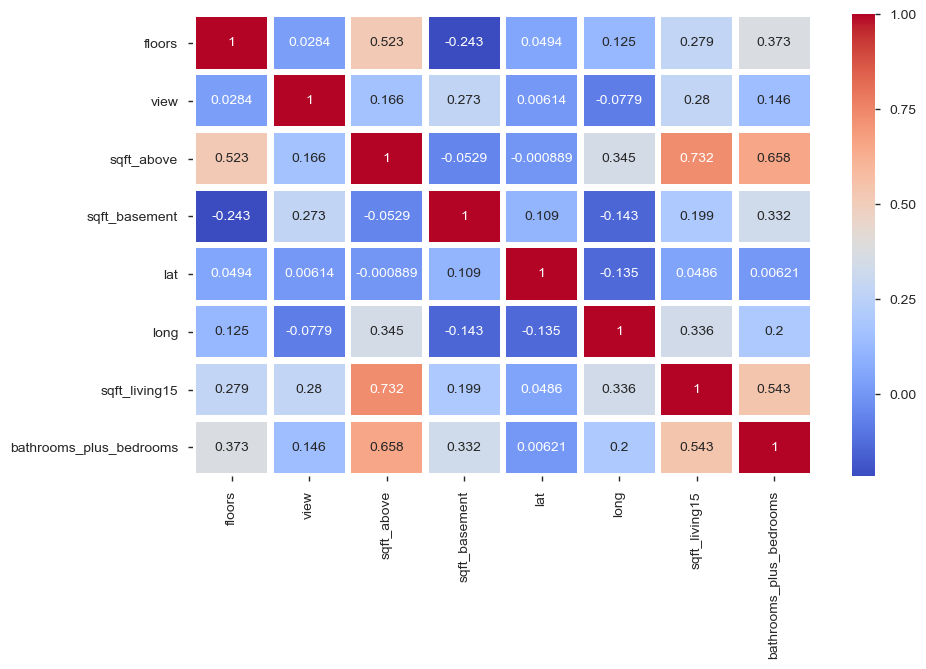

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_features_corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 4, robust = True, )
plt.show()

*Lastly, I've removed the 'sqft_living' and 'sqft_living15' due to their colinearity with multiple other features. The intent here is to keep features of properties within the model that clients can influence that would increase the value of the property by a predicted amount, i.e., adding a bathroom would increase house value by x amount, et cetera*

In [106]:
df_features.drop(columns = ['sqft_living15', 'sqft_above'], axis=1, inplace=True)

In [107]:
df_features_corr = df_features.corr()
df_features_corr

,floors,view,sqft_basement,lat,long,bathrooms_plus_bedrooms
floors,1.000000,0.028436,-0.242841,0.049419,0.125329,0.372647
view,0.028436,1.000000,0.273381,0.006141,-0.077894,0.146279
sqft_basement,-0.242841,0.273381,1.000000,0.109392,-0.143052,0.332148
lat,0.049419,0.006141,0.109392,1.000000,-0.135439,0.006210
long,0.125329,-0.077894,-0.143052,-0.135439,1.000000,0.200094
bathrooms_plus_bedrooms,0.372647,0.146279,0.332148,0.006210,0.200094,1.000000


*Running the correlation heatmap one last time to ensure any instances of extreme collinearity has been solved for.*

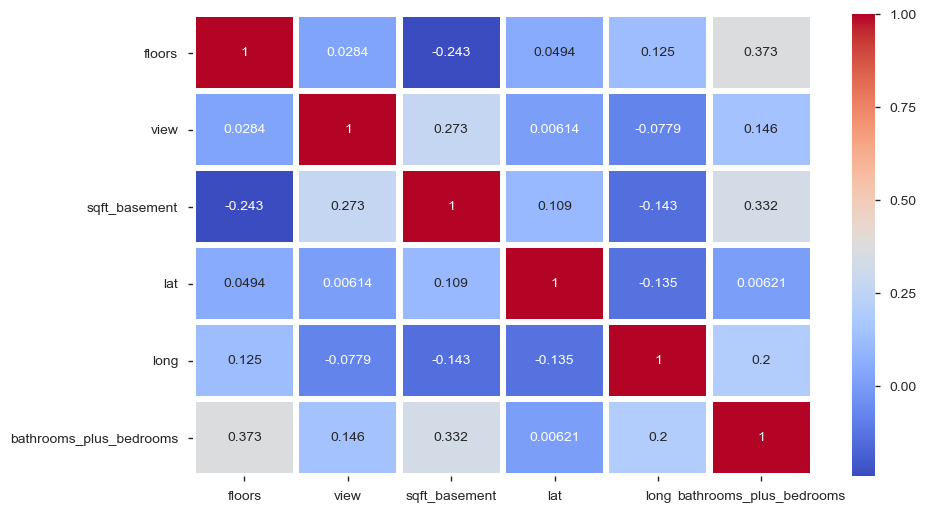

In [108]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_features_corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 4, robust = True, )
plt.show()

*Another way to assess collinearity is to run a condition against the features correlation matrix to confirm no collinearity above a defined threshold.*

In [109]:
abs(df_features_corr) > 0.50

,floors,view,sqft_basement,lat,long,bathrooms_plus_bedrooms
floors,True,False,False,False,False,False
view,False,True,False,False,False,False
sqft_basement,False,False,True,False,False,False
lat,False,False,False,True,False,False
long,False,False,False,False,True,False
bathrooms_plus_bedrooms,False,False,False,False,False,True


*Below, I run a scatter matrix of the features to asses the distribution and correlation of final list of features. I did this as a last step to get one last overview of the data before running the models.*

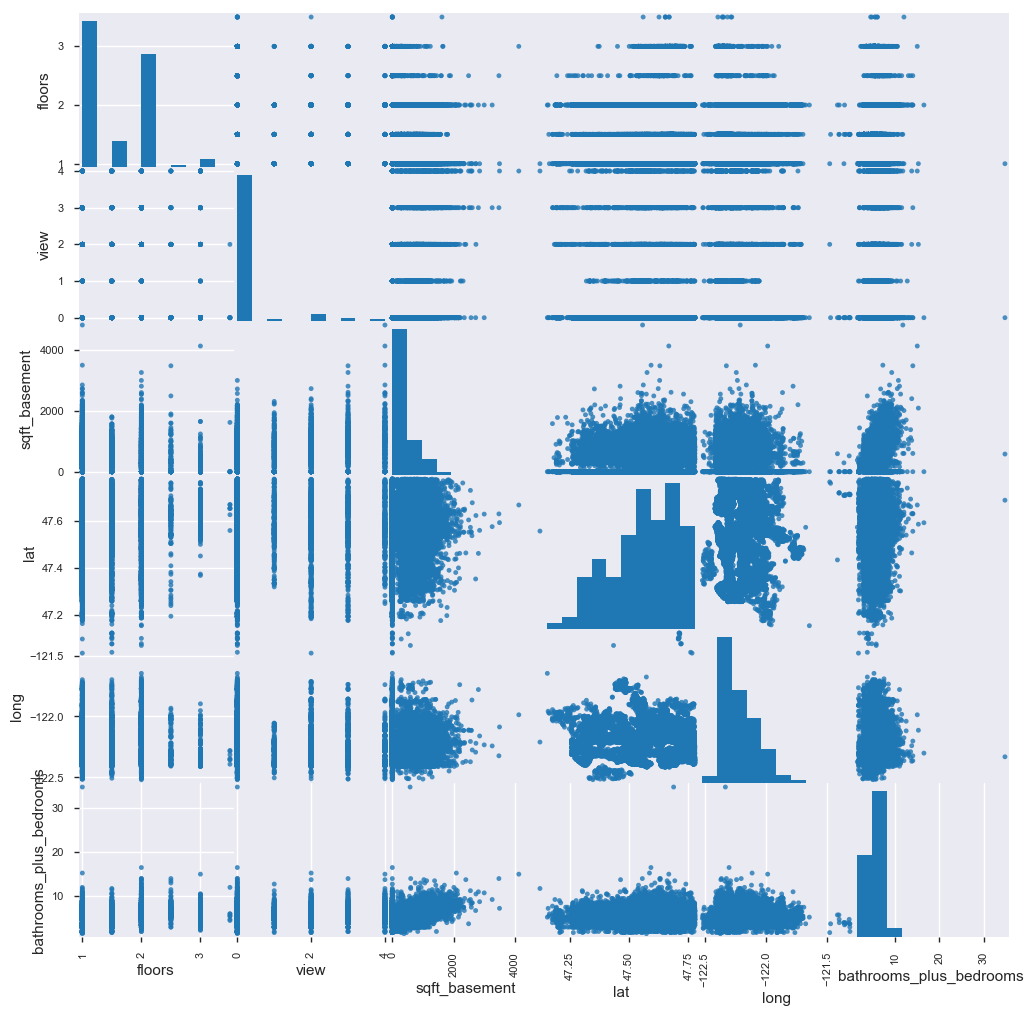

In [110]:
pd.plotting.scatter_matrix(df_features, figsize = (12,12), diagonal='hist', alpha = .8, )
plt.show()

#### *Running The OLS Models*


*To begin building the regression model, I first separated out the target variable from the remaining feature variables*

In [111]:
y = df['price']

x = df_features

In [112]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [113]:
x.head()

,floors,view,sqft_basement,lat,long,bathrooms_plus_bedrooms
0,1.0,0.0,0,47.5112,-122.257,4.00
1,2.0,0.0,400,47.7210,-122.319,5.25
2,1.0,0.0,0,47.7379,-122.233,3.00
3,1.0,0.0,910,47.5208,-122.393,7.00
4,1.0,0.0,0,47.6168,-122.045,5.00


*Below, I'm creating a constant variable to run two models with and without the constant to compare and contrast it's effect on the R-squared value*

In [114]:
X = sm.add_constant(x)

*Running the OLS model first WITH the constant.*

In [115]:
linreg = sm.OLS(y, X).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     2807.
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        16:56:51   Log-Likelihood:            -3.0019e+05
No. Observations:               21534   AIC:                         6.004e+05
Df Residuals:                   21527   BIC:                         6.005e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

*Inspecting the coefficients*

In [116]:
linreg.params

const                     -2.829937e+07
floors                     1.009780e+05
view                       1.469553e+05
sqft_basement              1.177922e+02
lat                        7.518067e+05
long                       6.187197e+04
bathrooms_plus_bedrooms    7.750851e+04
dtype: float64

*Observations:* 

 - Low P-values
 - Mediocre R-squared value
 - Residuals distribution has high skew and kurtosis
 - Jarque-Bera score appears to be high

*Running the initial model WITHOUT the constant*

In [117]:
linreg = sm.OLS(y, x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        16:56:51   Log-Likelihood:            -3.0032e+05
No. Observations:               21534   AIC:                         6.007e+05
Df Residuals:                   21528   BIC:                         6.007e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
floors                   1

*Inspecting the coefficients*

In [118]:
linreg.params

floors                     105253.011409
view                       148759.785820
sqft_basement                 137.242927
lat                        694932.300271
long                       271097.367748
bathrooms_plus_bedrooms     70840.775935
dtype: float64

*Observations:* 

- Low P-values
- Comfortably high R-squared value
- Residuals distribution has high skew and kurtosis
- Jarque-Bera dropped slightly


#### *Final Model*

*The final model below is run without the constant, and the feature variables: floors, view, sqft_basement, lat, long, and bathrooms_plus_bedrooms.*

In [119]:
linreg = sm.OLS(y, x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        16:56:52   Log-Likelihood:            -3.0032e+05
No. Observations:               21534   AIC:                         6.007e+05
Df Residuals:                   21528   BIC:                         6.007e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
floors                   1

In [126]:
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        16:58:00   Log-Likelihood:            -3.0032e+05
No. Observations:               21534   AIC:                         6.007e+05
Df Residuals:                   21528   BIC:                         6.007e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
floors                   1.053e+05   4165.503     25.268      0.000    9.71e+04    1.13e+05
view                     1.488e+05   2569.215     57.901      0.000    1.44e+05    1.54e+05
sqft_basement             137.2429      5.200     26.394      0.000     127.051     147.435
lat                      6.949e+05   1.34e+04     51.969      0.000    6.69e+05    7.21e+05
long                     2.711e+05   5197.479     52.159      0.000    2.61e+05    2.81e+05
bathrooms_plus_bedrooms  7.084e+04   1552.595     45.627      0.000    6.78e+04    7.39e+04
==============================================================================
Omnibus:                    18949.439   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1538311.343
Skew:                           3.864   Prob(JB):                         0.00
Kurtosis:                      43.679   Cond. No.                     4.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
linreg.params

floors                     105253.011409
view                       148759.785820
sqft_basement                 137.242927
lat                        694932.300271
long                       271097.367748
bathrooms_plus_bedrooms     70840.775935
dtype: float64

#### *Final Price Equation:* 

$$ \hat y = 0 + 105,253 \text{ (floors)} + 148,759 \text{ (view)} + 137 \text{ (sqft basement)} + 694,932 \text{ (latitude)} + 271,097 \text{ (longitude)} + 70,840 \text{ (bathrooms plus bedrooms)} $$


#### *Model Summary:*

- Model:

    - R-squared = .821 --> The feature variables predict 82.1% of the variance for the target
    - F-statistic = 1.649e+04

- Targets:

    - p-value = 0 --> The features predicting the target are not random
        - We have high confidence in our model!
    - coef = 
        - floors --> has a positive correlation with price
        - view --> has a positive correlation with price
        - sqft_basement --> has a positive correlation with price
        - lat --> has a positive correlation with price
        - long --> has a positive correlation with price
        - bathrooms_plus_bedrooms --> has a positive correlation with price
        
- Residuals:

    - Kurtosis = 43.679 -->  most of the residuals fall outside of 3 standard deviations of the mean
    - Skewness = 3.864 --> residuals are not symmetric
    - Jarque-Bera = 1,538,311.34 --> measure of normality appears very high
    
Write Up:

From the model above, the Prob(F-Test) indicates the features used in the model have coefficients that are not equal to 0 with high confidence. We can that features, given their positive coefficients, have a positive correlation with our target. We know this isn't random because our p-value is 0. Therefore, our features predict 82.1% of the varience of the target. Our residuals do not seem normally distributed, meaning our linear regression model is favoring 1 side of the data. 
        
    
------------------------------------------------------------------------------------------------------------------

#### *Model Validation:*

#### Train Test Split

*In order to validate the model and prove it's accuracy in predicting prices, we'll perform a train-test split using sklean's built in train_test_split feature. Below we split the data with 80% for training and 20% for testing*

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17227 4307 17227 4307


*Below I run the regression model with the training set*

In [142]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

*Then I calculate the prediction on the training set and on the testing set*

In [143]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

*Next, I calculate the residuals on the train and test sets*

In [144]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

*Lastly, I print the MSE for the predicted values on the train and test sets.*

In [145]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)       

print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 75447749058.17166
Test Mean Squarred Error: 74080625496.24939


#### Cross Validation

In [65]:
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")
cv_5_results

array([-8.40320459e+10, -8.03451138e+10, -6.62322812e+10, -6.83551531e+10,
       -7.91834421e+10])

**Interpreting The Results**

The training data returned a higher MSE meaning the test data returned less accurate predictions than the training set. The delta between the test and train data seems relatively minimal thus there is no cause for concern regarding our model. 

#### *Recommendations for LREA Going Forward:*

With the model above, LREA now has the tools necessary to consult clients on what factors might increase the final sale price of their property. Going forward, LREA should prepare the necessary infrastructure to allow the model to drive an application that accepts inputs on a given property and calculates the change in predicted value. 

LREA should begin vetting and contracting with mobile application developers to build out an interface by which LREA consultants can engage in the field when consulting prospective sellers, current sellers, and those looking to increase the value of the home. The application should accept inputs, run those inputs through the final model equation, and produce an output by which clients can visualize the impact on their properties value.

Additionally, LREA should establish a robust pipeline from the producers of these data to a locally owned server or cloud environment whereby the data can be access and run through the model for continious improvement in it's accruacy and predictive power over time. The more training data, the better. 

Finally, LREA should test the applications effectivness in the field and evaluate areas of further improvement for the application. Improvements should be surfaced to contracted developers to tweak the final application. 

#### *Conclusions:*

In conclusion, property values tend to vary with respect to geographic location throughout King County. In general, housing values increase the further West and North the property is within the county.

Additionally, and not surprisingly, property values increase as the number of bedrooms, bathrooms, square footage of the basements, and the number of floors increase. These factors contribute to the overall living size of the propterty which correlates highly with price. 

Last, the number of views a property has during the sales process tends to increase the property value. The implications here translate into more viewers means higher final sales price. Thus, it would behoove sellers & LREA to do what's necessary to garner more attention to the property during the listing price of the property. 


#### *Further Work / Areas for Improvement:*


- Data:
    - Collect additional housing sales data to confirm seasonality in home sales
    - Source additional feature data to improve the models paramaters thus increasing it's predictive accuracy. Below are some suggested features:
        - Median Household Incomes
        - Crime Rates
        - School Districts
        - Zoned Central Business Districts
        - Geographic Locations of Recreational Parks
    
- Modeling:
    - Further data conditioning is needed through min/max scaling or log transformations to ensure normal distributions among the feature variables
    - Skewness and Kurtosis figures indicate a non-normal distribution of the residuals, thus, needed to correct these scores 
    - Test the model on real world examples using homes that have yet to sell - attempt to predict sale price prior to closings. Adjust model as needed
    